# Critical F-test values
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f

### (1) Definition of confidence level limit

In [2]:
# Return value of x corresponsing to Frequentist upper (one-sided) limit on given CL
# Use 1-CL for lower limit

def problim(n1,n2,cl):
    
    # F-test distribution from scipy
    # Use inverse survival function (inverse of 1 - cumulative distribution)

    xlim = f.isf(1-cl,n1,n2)

    return xlim


### (2) Define considered probability values

In [3]:
# Considered values of probability

pvec = np.array([0.9,0.95,0.99,0.999])

# Considered numbers of degrees of freedom

Nmax = 20
N2 = 10

nvec = np.arange(1,Nmax+1)


### (3)  Calculate critical F-test curves

In [4]:
Ftab = np.empty((pvec.size,nvec.size))

for ip in range(pvec.size) :
    cl = pvec[ip]
    Ftab[ip,:] = problim(nvec,N2,cl)


### (4) Draw critical F-test curves

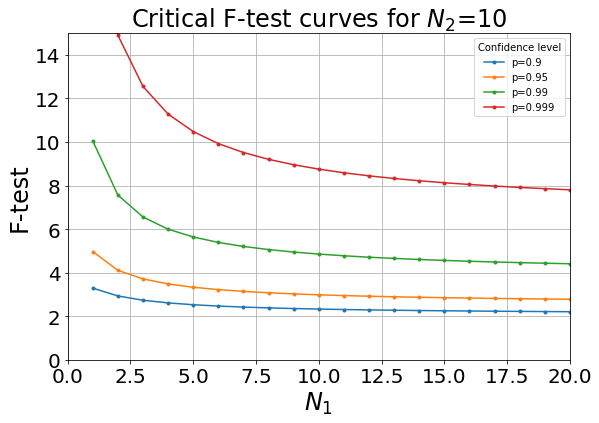

In [5]:
# Histogram frame

Xmin=0
Xmax=Nmax
Ymin=0
Ymax=14.99 

# Plot curves

plt.figure(figsize=(9, 6))

for ip in range(pvec.size) :
    cl = pvec[ip]
    plt.plot(nvec,Ftab[ip,:],'.-',label='p='+str(cl))


plt.title('Critical F-test curves for $N_2$='+str(N2),size=24)
plt.xlabel('$N_1$',size=24)
plt.ylabel('F-test',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')
plt.legend(title="Confidence level")

fname = '09_F-limit_'+str(N2)+'.png'
plt.savefig(fname)

plt.show()